# Extra challenge, instead of relying on the Fast Fourier Transform, can you implement your own Discrete Fourier Transform?


In [1]:
# As usual imports up top
import numpy as np
import matplotlib.pyplot as plt

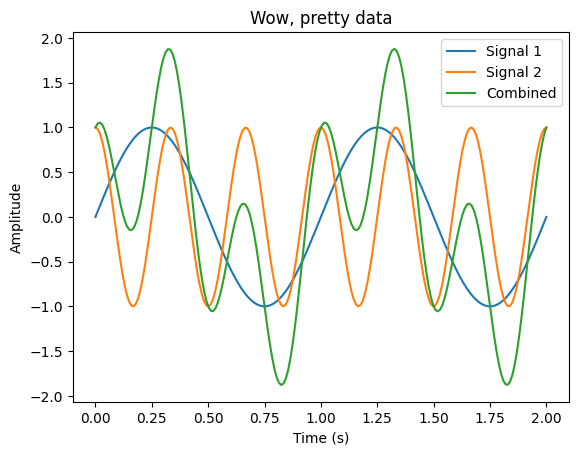

In [ ]:
# Let's make a signal
def get_sine_data(frequency=1, amplitude=1, phase_shift=0, sample_rate=100, n_seconds=2):  # Note how I put default values
  time = np.linspace(0, n_seconds, sample_rate*n_seconds)
  # time = np.arange(0, n_seconds, n_seconds/sample_rate)  # np.arange() can be used instead of linspace()
  sine = amplitude*np.sin(frequency*2*np.pi*time + phase_shift)  # + phase_shift

  return time, sine

# Let's test!
time_1, signal_1 = get_sine_data()  # See, now it only uses default values
time_2, signal_2 = get_sine_data(frequency=3, amplitude=1, phase_shift=0.5*np.pi)
combined = signal_1 + signal_2

plt.plot(time_1, signal_1)
plt.plot(time_2, signal_2)
plt.plot(time_1, combined)
plt.legend(["Signal 1", "Signal 2", "Combined"])
plt.title("Wow, pretty data")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

### End goal is:
### $$ X[k] = \sum_{n=0}^{N-1} x[n]e^{- 2 \pi j \frac{kn}{N}} $$

#### Let's start with, for all $n$:
#### $$x[n]e^{- 2 \pi j \frac{k}{N}} $$

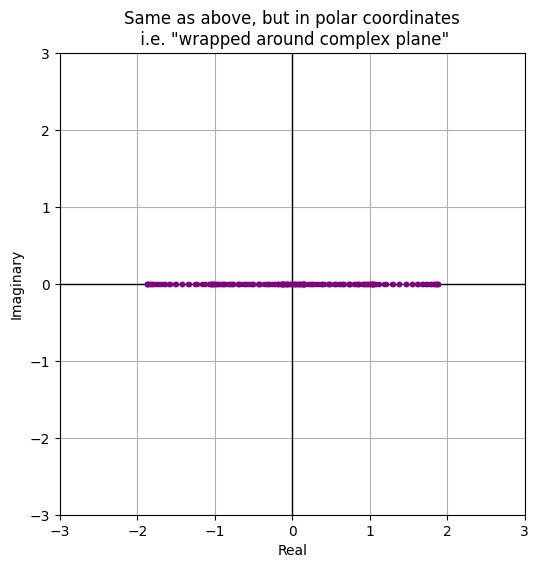

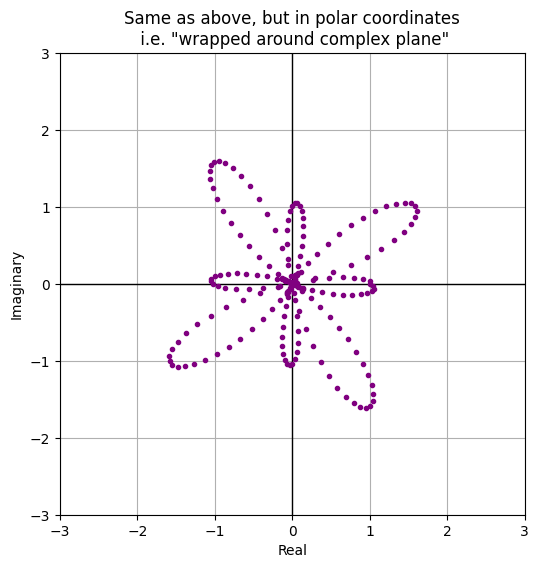

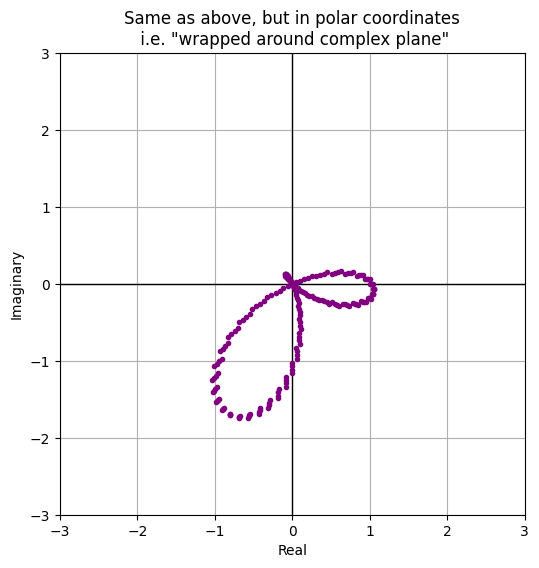

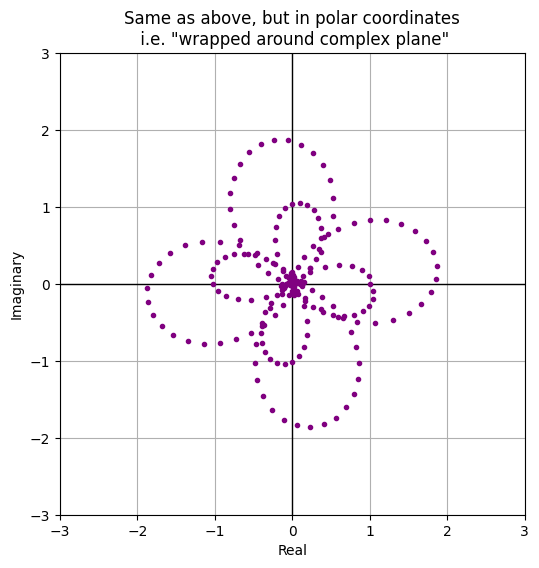

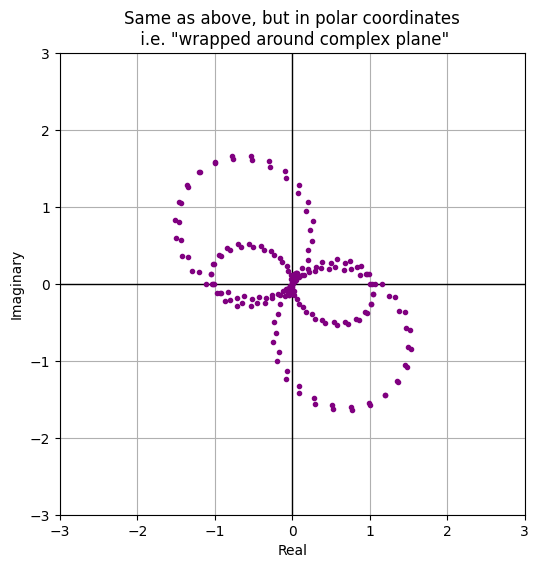

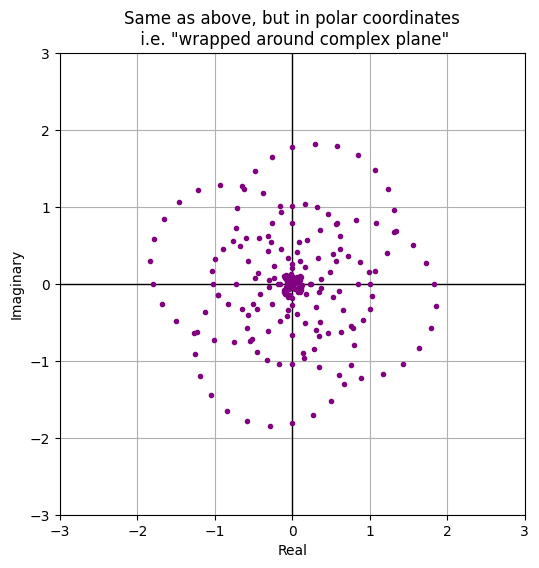

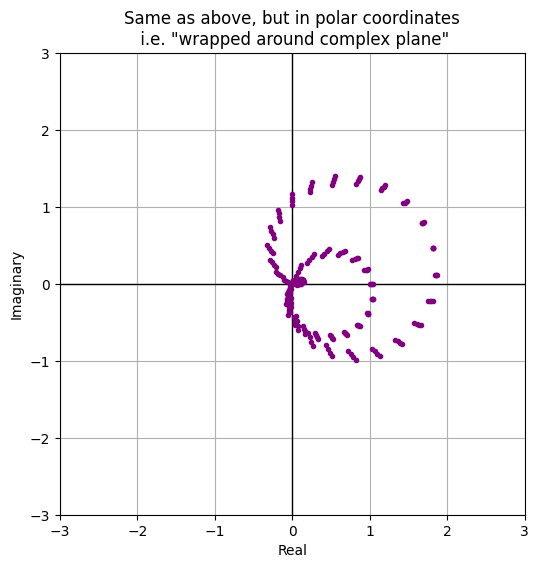

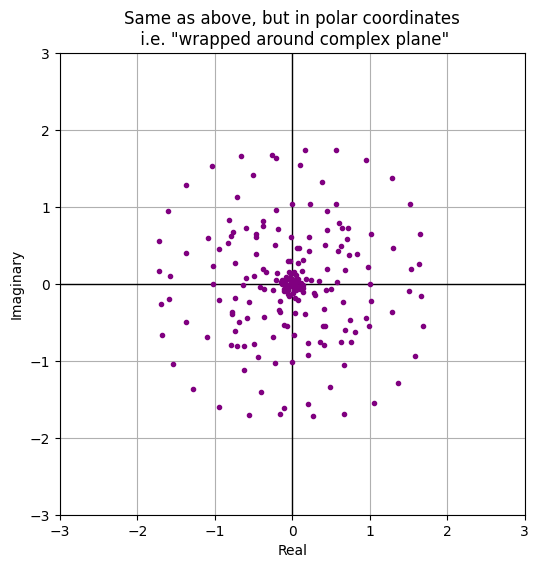

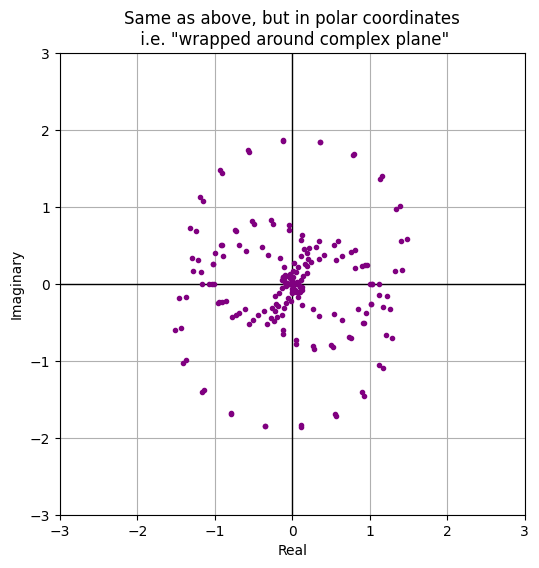

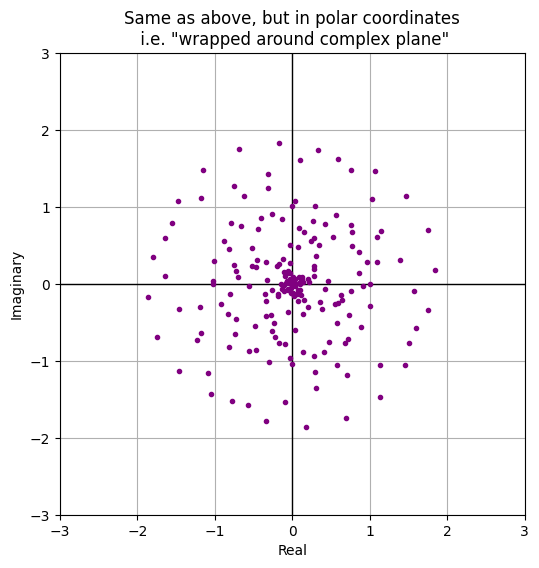

In [53]:
def DFT_kernel_k(x, k):
    N = len(x)
    n = np.arange(N)
    return x * np.exp(-2j * np.pi * k * n / N)   # elementwise kernel for this k

ks = np.arange(0, len(combined)//2)

kernout_outputs = [DFT_kernel_k(combined, k) for k in ks]

for kernout_output in kernout_outputs[:10]:
    # Plot in phasor form
    plt.figure(figsize=(6,6))
    # Thicker horizontal and vertical 0 lines
    plt.axhline(0, color='black', linewidth=1)  # Horizontal line
    plt.axvline(0, color='black', linewidth=1)  # Vertical line
    plt.gca().plot(kernout_output.real, kernout_output.imag, '.', c='purple')
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Same as above, but in polar coordinates\n i.e. \"wrapped around complex plane\"")  
    plt.grid(True)


(0.005+0j)


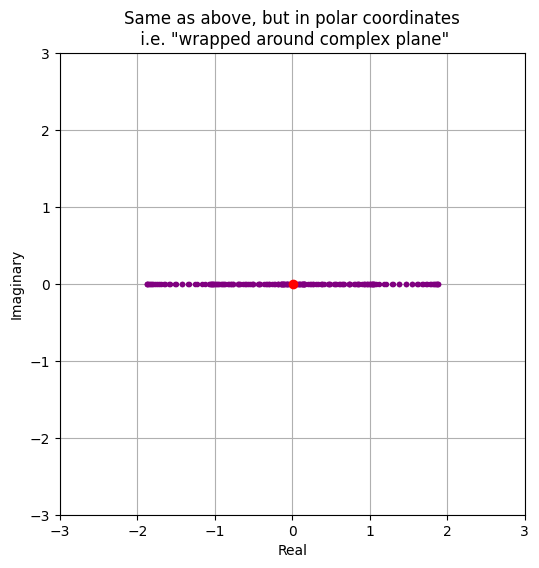

(0.005192455072709201-0.003223550837764151j)


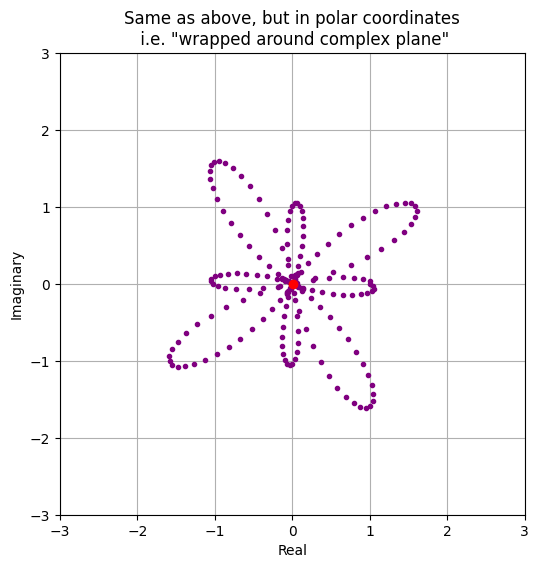

(0.021277691177015345-0.4982406805485642j)


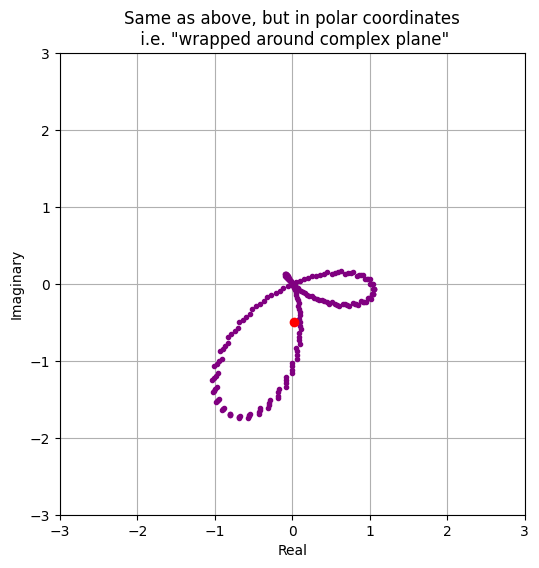

(0.006348369487049616+0.006385519481468638j)


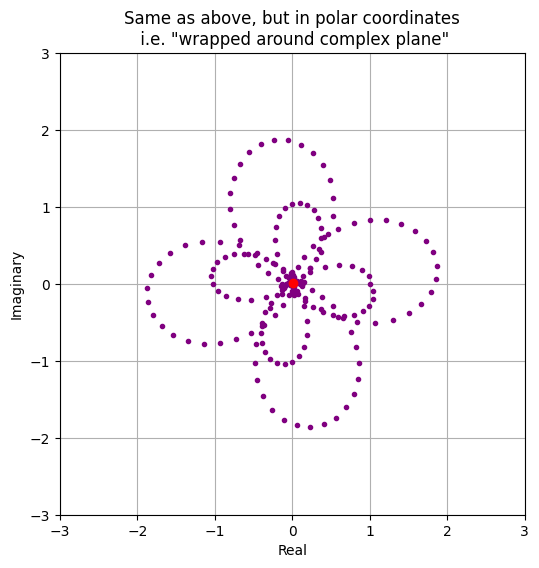

(0.008694148258745286+0.003916106351787185j)


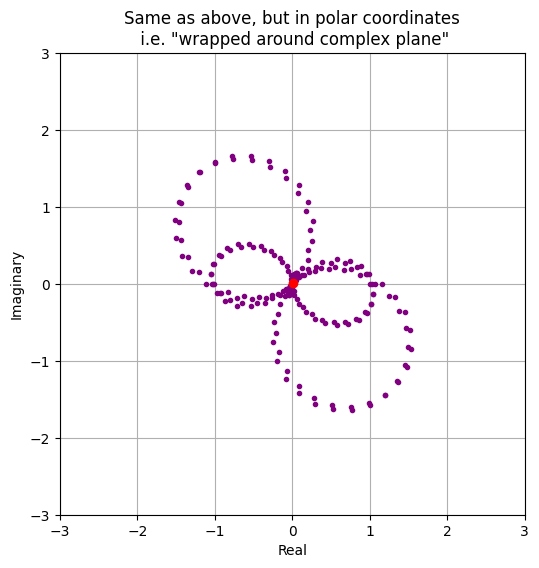

(0.015746949350404823+0.003645918741912162j)


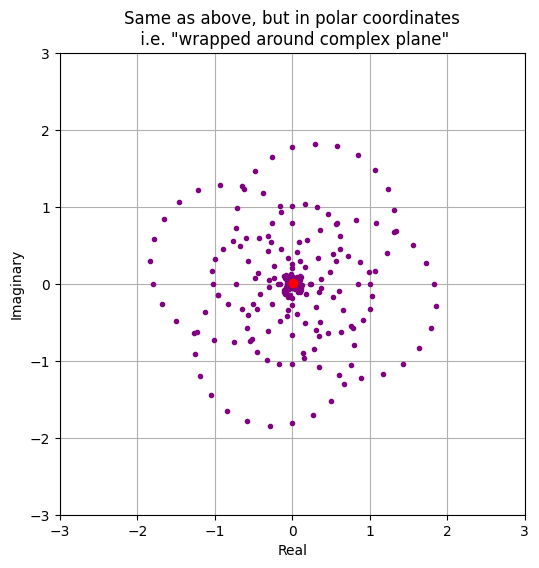

(0.49811235852234803+0.048982869378275375j)


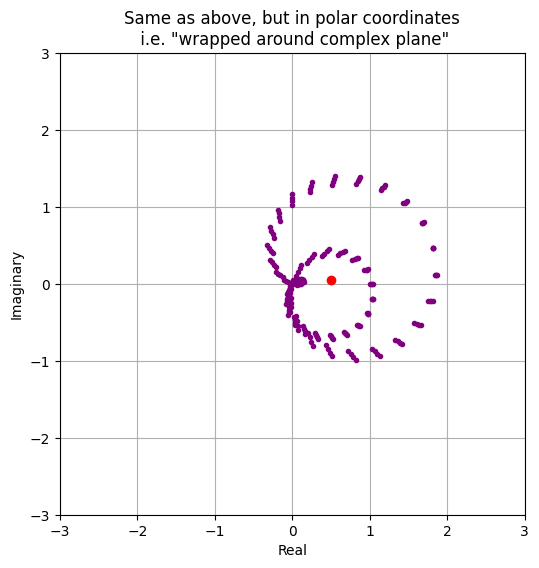

(-0.014443360840649407-1.762713004225702e-05j)


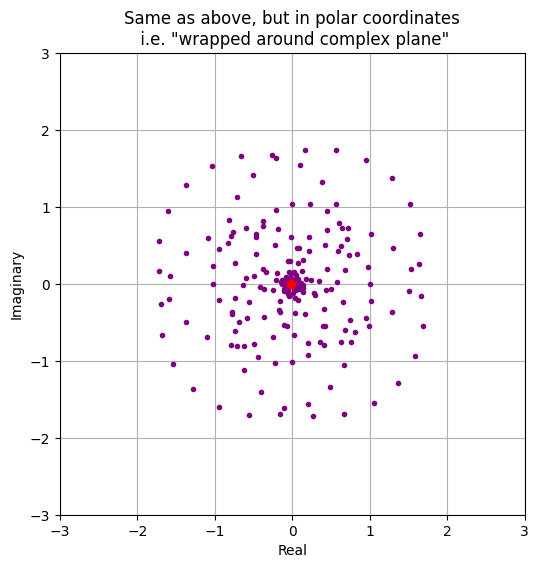

(-0.00667792863355292+0.0005110882261634941j)


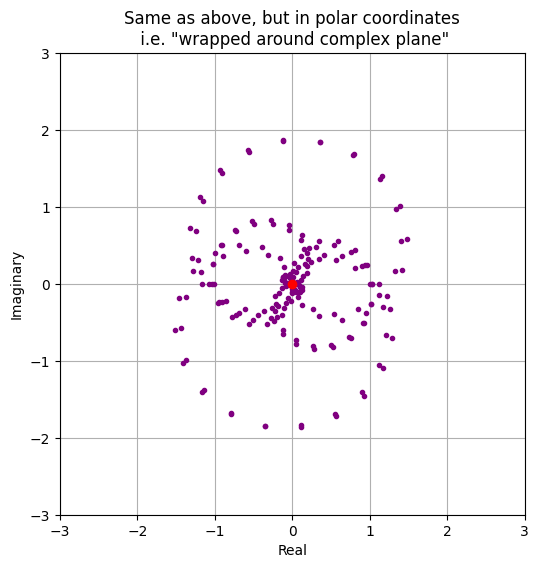

(-0.004185121828132044+0.0005951017843572703j)


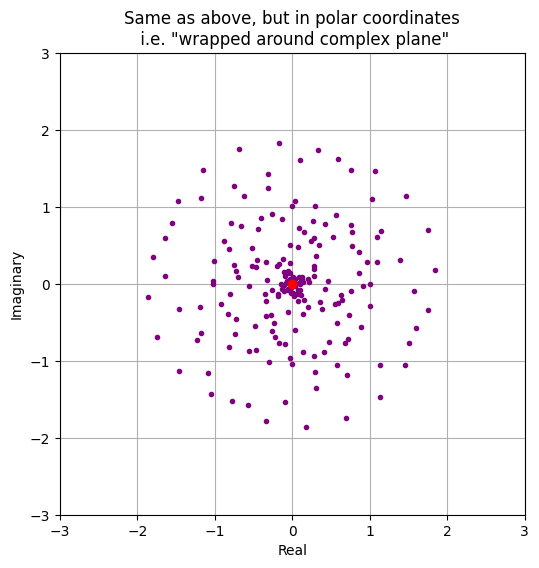

In [50]:
for kernout_output in kernout_outputs[:10]:
    # Compute the sum of all phasors for this k
    X_k = np.mean(kernout_output)
    print(X_k)

    # Plots that sum
    plt.figure(figsize=(6,6))
    # plt.axhline(0, color='black', linewidth=1)  # Horizontal line
    # plt.axvline(0, color='black', linewidth=1)  # Vertical line
    plt.scatter([X_k.real], [X_k.imag], c='red', zorder=3)
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Result of summing all phasors above, for this k")
    plt.grid(True)

    # Also plot the previous plot
    # Thicker horizontal and vertical 0 lines
    # plt.axhline(0, color='black', linewidth=1)  # Horizontal line
    # plt.axvline(0, color='black', linewidth=1)  # Vertical line
    plt.gca().plot(kernout_output.real, kernout_output.imag, '.', c='purple')
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.title("Same as above, but in polar coordinates\n i.e. \"wrapped around complex plane\"")  

    plt.show()
